In [17]:
import numpy as np
import tensorflow as tf
import json
import pandas as pd
import math
import os
import time
import spacy
import random
from DATASETS import ques_triples
import csv

#Importing machine learning libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import FastICA
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_fscore_support
from keras.models import Sequential
import numpy as np
import pickle
import cv2
import tensorflow as tf
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import load_model
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
np.set_printoptions(precision = 3, suppress = True)
from sklearn import model_selection
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
#from tensorflow.keras import  layers
#from tensorflow.keras.layers.experimental import preprocessing

In [44]:
#df = pd.read_csv("heart.csv")
#df = pd.read_csv("cardio.csv")
#df = pd.read_csv("framingham.csv")
df = pd.read_csv("filtered_framingham.csv")
#df = pd.read_csv("balanced_framingham.csv")

In [45]:
df

,Unnamed: 0,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,TenYearCHD
0,0,1,39,4.0,0,0.0,0,0,0,195.0,26.97,80.0,0
1,1,0,46,2.0,0,0.0,0,0,0,250.0,28.73,95.0,0
2,2,1,48,1.0,1,0.0,0,0,0,245.0,25.34,75.0,0
3,3,0,61,3.0,1,0.0,0,1,0,225.0,28.58,65.0,1
4,4,0,46,3.0,1,0.0,0,0,0,285.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,4235,0,48,2.0,1,0.0,0,0,0,248.0,22.00,84.0,0
4236,4236,0,44,1.0,1,0.0,0,0,0,210.0,19.16,86.0,0
4237,4237,0,52,2.0,0,0.0,0,0,0,269.0,21.47,80.0,0
4238,4238,1,40,3.0,0,0.0,0,1,0,185.0,25.60,67.0,0


In [46]:
len(df)

4240

In [47]:
df['TenYearCHD']

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [48]:
#df =df.drop(['id','age'],axis = 1)
df = df.drop(['Unnamed: 0'], axis = 1)

# finding the null values in dataset for framingham dataset
df.isnull().sum()

#converting all the datatypes into float
#df = df.astype(float)
df.round(3)

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,195.0,26.97,80.0,0
1,0,46,2.0,0,0.0,0,0,0,250.0,28.73,95.0,0
2,1,48,1.0,1,0.0,0,0,0,245.0,25.34,75.0,0
3,0,61,3.0,1,0.0,0,1,0,225.0,28.58,65.0,1
4,0,46,3.0,1,0.0,0,0,0,285.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,0.0,0,0,0,248.0,22.00,84.0,0
4236,0,44,1.0,1,0.0,0,0,0,210.0,19.16,86.0,0
4237,0,52,2.0,0,0.0,0,0,0,269.0,21.47,80.0,0
4238,1,40,3.0,0,0.0,0,1,0,185.0,25.60,67.0,0


In [49]:
X_FEATURES = ['male','age','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol'
              ,'BMI','heartRate']
x_features = df.loc[:,X_FEATURES].values.astype(int)
y_features = df.loc[:,['TenYearCHD']].values.astype(int)

In [34]:
X_FEATURES = ['2','3','4','5','6','7','8','9'
              '10']
x_features = df.loc[:,X_FEATURES].values.astype(int)
y_features = df.loc[:,['y']].values.astype(int)

In [50]:
X_Train, X_Test, Y_Train, Y_Test = model_selection.train_test_split(x_features, y_features, test_size=0.20, random_state = 101)

In [51]:
from sklearn.linear_model import LogisticRegression

Logistic_Reg = LogisticRegression(penalty = 'l2', tol = 0.0001, C = 1.0)
cl = Logistic_Reg.fit(X_Train, Y_Train)
print("LOGISTIC REGRESSION :", Logistic_Reg.score(X_Test, Y_Test))

Y_PREDICTION = Logistic_Reg.predict(X_Test)
print("ACCURACY OF MODEL :", metrics.accuracy_score(Y_Test, Y_PREDICTION))

#USING CROSS VALIDATION

scores = cross_val_score(Logistic_Reg, x_features, y_features, cv = 5)
print("CROSS-V:", scores.mean())

C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

LOGISTIC REGRESSION : 0.8655660377358491
ACCURACY OF MODEL : 0.8655660377358491


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

CROSS-V: 0.8459905660377359


In [26]:
print("recall precision f1-score")
print(precision_recall_fscore_support(Y_Test, Y_PREDICTION, average='weighted'))

recall precision f1-score
(0.8119113683209132, 0.8655660377358491, 0.8184631826531839, None)


Text(0.5, 1.0, 'LOGITSTIC REGRESSION')

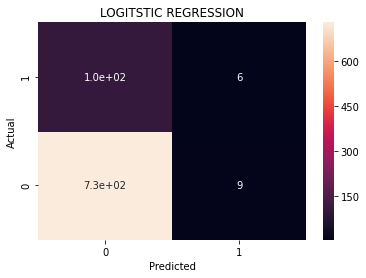

In [27]:
import seaborn as sn
confusion_matrix=pd.crosstab(Y_Test.ravel(),Y_PREDICTION,rownames=['Actual'],colnames=['Predicted'])
ax = sn.heatmap(confusion_matrix,annot=True)
ax.set_ylim([0,2])
ax.set_title("LOGITSTIC REGRESSION")

In [54]:
def prediction_value(m):
    if(Logistic_Reg.predict(X_Test[[m]]==0)):
        print("HEART RISK")
    else:
        print("NOT A HEART RISK")

In [ ]:
# PRDITCION OF VALUES
prediction_value(1)
print("Actual value",Y_Test[1])

In [ ]:
prediction_value(45)
print("Actual value",Y_Test[45])

## ANN MODEL

In [35]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.round(3)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,y
0,0.000,1.0,0.184,1.000,0.0,0.0,0.0,0.0,0.0,0.149,0.277,0.364,0.0
1,0.000,0.0,0.368,0.333,0.0,0.0,0.0,0.0,0.0,0.243,0.320,0.515,0.0
2,0.000,1.0,0.421,0.000,1.0,0.0,0.0,0.0,0.0,0.234,0.238,0.313,0.0
3,0.001,0.0,0.763,0.667,1.0,0.0,0.0,1.0,0.0,0.200,0.316,0.212,1.0
4,0.001,0.0,0.368,0.667,1.0,0.0,0.0,0.0,0.0,0.302,0.183,0.414,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.999,0.0,0.421,0.333,1.0,0.0,0.0,0.0,0.0,0.239,0.157,0.404,0.0
4236,0.999,0.0,0.316,0.000,1.0,0.0,0.0,0.0,0.0,0.175,0.088,0.424,0.0
4237,1.000,0.0,0.526,0.333,0.0,0.0,0.0,0.0,0.0,0.275,0.144,0.364,0.0
4238,1.000,1.0,0.211,0.667,0.0,0.0,0.0,1.0,0.0,0.132,0.244,0.232,0.0


In [38]:
normalized_df = normalized_df.drop(['Unnamed: 0'], axis = 1)

In [39]:
properties = list(normalized_df.columns.values)
properties.remove('y')
properties.remove('0')
properties.remove('1')
print(properties)
X = normalized_df[properties]
y = normalized_df['y']

['2', '3', '4', '5', '6', '7', '8', '9', '10']


In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [41]:
X_train

,2,3,4,5,6,7,8,9,10
70,1.000000,0.0,0.0,0.0,0.0,0.0,0.239389,0.334707,0.262626
391,0.000000,0.0,0.0,0.0,0.0,0.0,0.234295,0.269026,0.212121
3822,0.666667,0.0,0.0,0.0,0.0,0.0,0.132428,0.160204,0.414141
4008,0.333333,0.0,0.0,0.0,0.0,0.0,0.084890,0.286961,0.515152
2114,0.000000,1.0,0.0,0.0,0.0,0.0,0.186757,0.258604,0.363636
...,...,...,...,...,...,...,...,...,...
925,0.666667,1.0,0.0,0.0,0.0,0.0,0.151104,0.121667,0.363636
2315,0.000000,0.0,0.0,0.0,1.0,0.0,0.190153,0.268056,0.282828
4027,0.333333,0.0,0.0,0.0,1.0,0.0,0.078098,0.309258,0.191919
1495,1.000000,0.0,0.0,0.0,0.0,0.0,0.089983,0.277993,0.080808


In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
#from keras.optimizers import SGD
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(9,)),
    keras.layers.Dense(96, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(24, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.sigmoid),
])

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = 10, epochs = 150,validation_data=(X_val, y_val))

Epoch 1/150
272/272 [==============================] - 24s 4ms/step - loss: 0.5065 - accuracy: 0.8424 - val_loss: 0.4010 - val_accuracy: 0.8733
Epoch 2/150
272/272 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8421 - val_loss: 0.3877 - val_accuracy: 0.8733
Epoch 3/150
272/272 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8565 - val_loss: 0.3913 - val_accuracy: 0.8733
Epoch 4/150
272/272 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.8385 - val_loss: 0.3824 - val_accuracy: 0.8733
Epoch 5/150
272/272 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8477 - val_loss: 0.3976 - val_accuracy: 0.8733
Epoch 6/150
272/272 [==============================] - 1s 2ms/step - loss: 0.4281 - accuracy: 0.8322 - val_loss: 0.3894 - val_accuracy: 0.8733
Epoch 7/150
272/272 [==============================] - 1s 2ms/step - loss: 0.4202 - accuracy: 0.8460 - val_loss: 0.3836 - val_accuracy: 0.873

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 96)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2

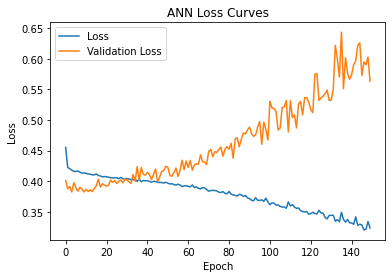

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.title("ANN Loss Curves")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# SAVING THE MODELS H5 FILE FOR ANN and Pickle for LOGISTIC REG
from keras.models import load_model
model.save("C:/Users/Praty/OneDrive/Desktop/Heart_Risk.h5")
filename = 'C:/Users/Praty/OneDrive/Desktop/Heart_Risk_lr.pckl' 
pickle.dump(Logistic_Reg, open(filename, 'wb'))

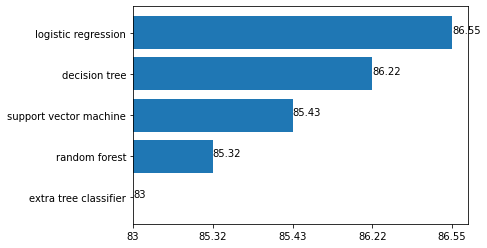

In [53]:
x = ['extra tree classifier','random forest','support vector machine','decision tree','logistic regression']
y = ['83','85.32','85.43','86.22','86.55']
import matplotlib.pyplot as plt
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.show()